#SVM & Naive bayes

#1. What is a Support Vector Machine (SVM)?
  - SVM is a machine learning algorithm used for classification and regression. It tries to find the best line (or hyperplane) that separates data into different classes with the maximum margin (distance) between the line and the nearest points of each class.

#2. What is the difference between Hard Margin and Soft Margin SVM?
  - Hard Margin SVM doesn't allow any mistakes; it tries to perfectly separate the classes. It only works when the data is perfectly separable.
  - Soft Margin SVM allows some mistakes or overlaps to improve flexibility. It's more practical for real-world, messy data.

#3. What is the mathematical intuition behind SVM?
  - SVM aims to find a line (or surface) that not only separates the classes but does so by maximizing the margin between the classes. Mathematically, it minimizes an objective function that balances classification accuracy and margin size.

#4. What is the role of Lagrange Multipliers in SVM?
  - Lagrange Multipliers help convert the SVM optimization problem into a form that's easier to solve using mathematical tools. They help us enforce constraints (like correct classification) while optimizing the margin.

#5. What are Support Vectors in SVM?
  - Support vectors are the data points that lie closest to the decision boundary (the margin). They are the most important points because they determine the position of the separating line or plane.

#6. What is a Support Vector Classifier (SVC)?
  - SVC is the classification version of SVM. It’s the actual model used to classify data points into different categories using the support vector method.

#7. What is a Support Vector Regressor (SVR)?
  - SVR is a version of SVM used for regression tasks. Instead of finding a separating line, it finds a function that fits the data within a certain margin of error.

#8. What is the Kernel Trick in SVM?
  - The kernel trick allows SVM to work in higher dimensions without actually calculating the coordinates. It transforms non-linearly separable data into a higher space where it becomes linearly separable.

#9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
  - Linear Kernel: Good for simple problems where classes are linearly separable.
  - Polynomial Kernel: Can model more complex boundaries by using polynomial functions.
  - RBF Kernel (Radial Basis Function): Very powerful; works well when the data is not linearly separable. It maps data to infinite dimensions.

#10. What is the effect of the C parameter in SVM?
   - The C parameter controls the trade-off between a wide margin and fewer classification errors.
     * A small C creates a wider margin but allows more errors.
     * A large C tries to classify all points correctly, leading to a narrow margin.

#11. What is the role of the Gamma parameter in RBF Kernel SVM?
   - Gamma controls how far the influence of a single training point reaches.
     * A high gamma means the model focuses only on nearby points (can overfit).
     * A low gamma means the model looks at distant points too (can underfit).

#12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
   - Naïve Bayes is a classification algorithm based on Bayes’ Theorem. It assumes all features are independent, which is rarely true in real life. This “naïve” assumption makes the algorithm simple and fast.

#13. What is Bayes Theorem?
   - Bayes Theorem calculates the probability of something happening based on prior knowledge. In Naïve Bayes, it is used to calculate the probability that a data point belongs to a certain class.

#14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
   - Gaussian Naïve Bayes: Used when features are continuous and follow a normal distribution.
   - Multinomial Naïve Bayes: Works with count data (like how many times a word appears).
   - Bernoulli Naïve Bayes: Used when features are binary (yes/no, 0/1).

#15. When should you use Gaussian Naïve Bayes over other variants?
   - Use Gaussian Naïve Bayes when your features are continuous and you expect them to follow a bell-shaped (normal) curve, like height, weight, or age.

#16. What are the key assumptions made by Naïve Bayes?
   - All features are independent (no influence on each other).
   - All features contribute equally to the result.
   - Data points are generated from the same distribution.

#17. What are the advantages and disadvantages of Naïve Bayes?
   - Advantages:
     * Simple, fast, and easy to implement
     * Works well with high-dimensional data
     * Good baseline model for classification

   - Disadvantages:
     * The independence assumption is rarely true
     * Can perform poorly when features are highly correlated

#18. Why is Naïve Bayes a good choice for text classification?
   - In text classification, features (like word presence or frequency) are often treated as independent, making Naïve Bayes perform surprisingly well. It is also fast and works well with large datasets like emails or reviews.

#19. Compare SVM and Naïve Bayes for classification tasks.
   - SVM: More powerful, especially with complex data and kernels; slower but more accurate.
   - Naïve Bayes: Faster, simpler, and better for text or high-dimensional data; less accurate with dependent features.

#20. How does Laplace Smoothing help in Naïve Bayes?
   - Laplace Smoothing prevents the model from assigning zero probability to a feature that didn't appear in the training data. It adds a small value (usually 1) to all counts to make sure every word or feature has some probability.

In [1]:
#21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
linear_acc = accuracy_score(y_test, svm_linear.predict(X_test))

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
rbf_acc = accuracy_score(y_test, svm_rbf.predict(X_test))

print("Linear Kernel Accuracy:", linear_acc)
print("RBF Kernel Accuracy:", rbf_acc)

Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


In [3]:
#23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3320115421348744


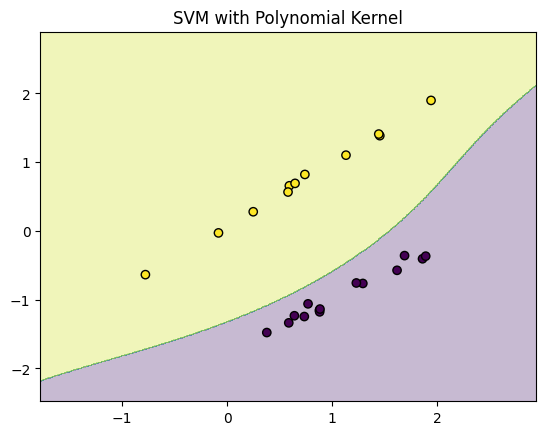

In [4]:
#24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                     n_clusters_per_class=1, n_samples=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM with Polynomial Kernel")
    plt.show()

plot_decision_boundary(X_test, y_test, clf)

In [5]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


In [6]:
#26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categories = ['alt.atheism', 'sci.space', 'comp.graphics', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9882005899705014


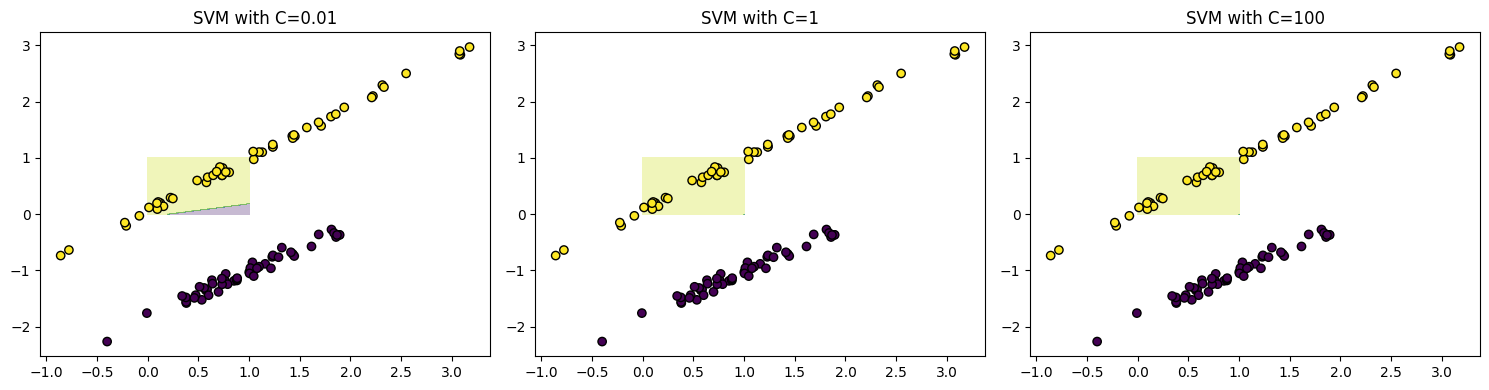

In [7]:
#27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

C_values = [0.01, 1, 100]

plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(1, 3, i + 1)
    plt.title(f"SVM with C={C}")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                         np.linspace(ylim[0], ylim[1], 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

plt.tight_layout()
plt.show()

In [8]:
#28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, random_state=42)
X = (X > 0).astype(int)  # Make binary features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


In [9]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, model_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [10]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_regular = accuracy_score(y_test, gnb.predict(X_test))

class CustomGaussianNB(GaussianNB):
    def _update_variance(self, var):
        return var + 1e-2  # Small value to avoid zero variance

gnb_smoothed = CustomGaussianNB()
gnb_smoothed.fit(X_train, y_train)
acc_smoothed = accuracy_score(y_test, gnb_smoothed.predict(X_test))

print("Accuracy without Laplace:", acc_regular)
print("Accuracy with simulated Laplace:", acc_smoothed)

Accuracy without Laplace: 0.9777777777777777
Accuracy with simulated Laplace: 0.9777777777777777


In [11]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 1.0


In [12]:
#32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = SVC()
model1.fit(X_train, y_train)
print("Without Class Weight:")
print(classification_report(y_test, model1.predict(X_test)))

model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
print("With Class Weight:")
print(classification_report(y_test, model2.predict(X_test)))

Without Class Weight:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       270
           1       0.60      0.30      0.40        30

    accuracy                           0.91       300
   macro avg       0.76      0.64      0.68       300
weighted avg       0.89      0.91      0.90       300

With Class Weight:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       270
           1       0.50      0.57      0.53        30

    accuracy                           0.90       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.91      0.90      0.90       300



In [13]:
#33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categories = ['rec.autos', 'talk.politics.misc']
data = fetch_20newsgroups(subset='all', categories=categories)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test_vec)))

Accuracy: 0.9943396226415094


In [14]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))

print("SVM Accuracy:", svm_acc)
print("Naïve Bayes Accuracy:", nb_acc)

SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777


In [15]:
#35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = GaussianNB()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model2 = GaussianNB()
model2.fit(X_train_selected, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test_selected))

print("Accuracy without feature selection:", acc1)
print("Accuracy with feature selection:", acc2)

Accuracy without feature selection: 0.9415204678362573
Accuracy with feature selection: 0.9590643274853801


In [16]:
#36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO).
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr.predict(X_test))

ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
acc_ovo = accuracy_score(y_test, ovo.predict(X_test))

print("Accuracy (OvR):", acc_ovr)
print("Accuracy (OvO):", acc_ovo)

Accuracy (OvR): 0.6666666666666666
Accuracy (OvO): 0.6296296296296297


In [17]:
#37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Kernel={kernel}, Accuracy={acc}")

Kernel=linear, Accuracy=0.951048951048951
Kernel=poly, Accuracy=0.9370629370629371
Kernel=rbf, Accuracy=0.9370629370629371


In [18]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

X, y = load_iris(return_X_y=True)
skf = StratifiedKFold(n_splits=5)
model = SVC()

scores = cross_val_score(model, X, y, cv=skf)
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average accuracy: 0.9666666666666666


In [19]:
#39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = GaussianNB(priors=[1/3, 1/3, 1/3])
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

model2 = GaussianNB(priors=[0.7, 0.2, 0.1])
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

print("Accuracy with uniform priors:", acc1)
print("Accuracy with skewed priors:", acc2)

Accuracy with uniform priors: 1.0
Accuracy with skewed priors: 0.9777777777777777


In [20]:
#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10)
rfe.fit(X_train, y_train)

model = SVC(kernel='linear')
model.fit(rfe.transform(X_train), y_train)
y_pred = model.predict(rfe.transform(X_test))

print("Accuracy after RFE:", accuracy_score(y_test, y_pred))

Accuracy after RFE: 0.9090909090909091


In [21]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87        56
           1       0.88      0.99      0.93        87

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



In [22]:
#42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GaussianNB()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_proba))

Log Loss: 0.12112241417304495


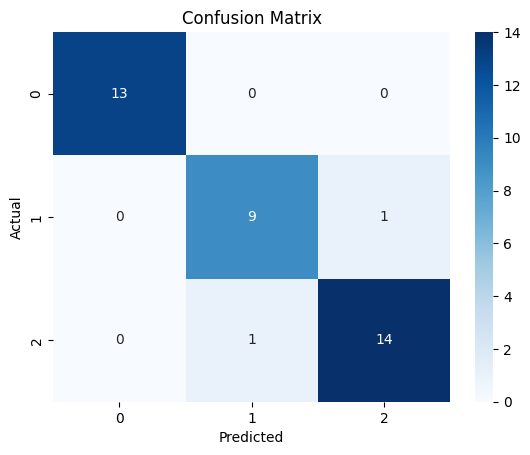

In [23]:
#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
#44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.8614355190531352


In [25]:
#45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GaussianNB()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.986247947454844


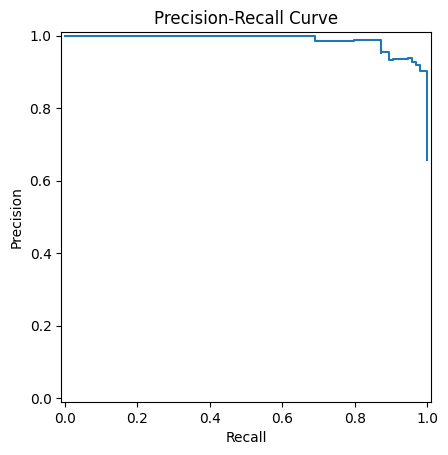

In [26]:
#46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC(probability=True)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title("Precision-Recall Curve")
plt.show()